# Bias-variance trade-off, model selection and cross validation – Computer exercises

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn.preprocessing as skl_pre
import sklearn.linear_model as skl_lm
import sklearn.discriminant_analysis as skl_da
import sklearn.neighbors as skl_nb
import sklearn.model_selection as skl_ms

## 6.1 Cross validation in $k$-NN
In this exercise we will return to the `biopsy` data set also used in Exercise 4.1 (Lesson 4). We will try to determine suitable value of $k$ in $k$-NN for this data. For simplicity, we will only consider the three attributes in columns `V3`, `V4`and `V5` in this problem.

### (a) 
Consider all data as training data. Investigate how the training error varies with different values of $k$ (hint: use a `for`-loop). Which $k$ gives the best result? Is it a good choice of $k$?

In [2]:
# Load the data
# url = 'data/biopsy.csv'
url = 'https://uu-sml.github.io/course-sml-public/data/biopsy.csv'
biopsy = pd.read_csv(url, dtype={'ID': str}).dropna().reset_index(drop=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      683 non-null    object 
 1   V1      683 non-null    int64  
 2   V2      683 non-null    int64  
 3   V3      683 non-null    int64  
 4   V4      683 non-null    int64  
 5   V5      683 non-null    int64  
 6   V6      683 non-null    float64
 7   V7      683 non-null    int64  
 8   V8      683 non-null    int64  
 9   V9      683 non-null    int64  
 10  class   683 non-null    object 
dtypes: float64(1), int64(8), object(2)
memory usage: 58.8+ KB
0.04685212298682284
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
[0.029282576866764276, 0.0424597364568082, 0.03513909224011713, 0.03953147877013177, 0.0424597364568082, 0.04538799414348463, 0.0424597364568082, 0.048316251830161056, 0.04685212298682284, 0.048316251830161056, 0.048316251830161056, 0.048316251830161056, 0.04685212298682284, 0.04831

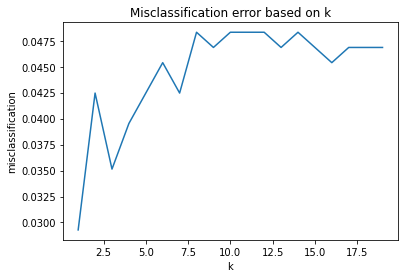

In [20]:
biopsy.info()
X = biopsy[["V3","V4","V5"]]
Y = biopsy["class"]
k=20
model = skl_nb.KNeighborsClassifier(n_neighbors=k)
model.fit(X,Y)
prediction = model.predict(X)
print(np.mean(prediction !=Y))

errors = []

k=np.arange(1,20)
for n in k:
    model = skl_nb.KNeighborsClassifier(n_neighbors=n)
    model.fit(X,Y)
    prediction = model.predict(X)
    errors.append(np.mean(prediction !=Y))
    print(n)

print(errors)
print(k)
plt.plot(k,errors)
plt.title("Misclassification error based on k")
plt.xlabel("k")
plt.ylabel("misclassification")
plt.show()

### (b) <a id='6.1-b'></a>
Split the data randomly into a training and validation set, and see how well you perform on the validation set. (Previously, we have used the terminology "training" and "test" set. If the other set (not the training set) is used to make design decisions, such as choosing $k$, it is really not a test set, but rather a "validation" set. Hence the
terminology.) Which $k$ gives the best result?

### (c) 
Perform [(b)](#6.1-b) 10 times for different validation sets and average the result. Which $k$ gives the best result?

### (d) 
Perform 10-fold cross-validation by first randomly permute the data set, divide the data set into 10 equally sized parts and loop through them by taking one part as validation set and the rest as training set each time. Which $k$ gives the best result?

## 6.2 Cross validation for model choice

In this problem we will consider the data sets `data/pima_tr.csv` and `data/pima_te.csv`. Your task is to do as good prediction as possible for the test set `pima_te`, but you are only allowed to look at the true output in `pima_te` once (like in the real life, where you design and implement a method, and then hand it over to the ultimate test, namely the user). Hence, you will have to use `pima_tr` for both deciding which model to use and training the model.

The data set describes the prevalence of diabetes in women at least 21 years old of Pima Indian heritage, living near Phoenix, Arizona, USA. The data set describes, for each individual, whether she has diabetes or not, her age, the diabetes pedigree function (a summary of the diabetes history in her family), BMI, skin thickness, blood pressure, plasma glucose concentration and number of pregnancies.

The data frame contains the following columns:  
`npreg` number of pregnancies.  
`glu` plasma glucose concentration in an oral glucose tolerance test.  
`bp` diastolic blood pressure (mm Hg).  
`skin` triceps skin fold thickness (mm).  
`bmi` body mass index (weight in kg/(height in m)\^2).  
`ped` diabetes pedigree function.  
`age` age in years.  
`type` Yes or No, for diabetic according to WHO criteria.


### (a)
Load the library and familiarize yourself with `pima_tr`

In [28]:
# Load the datasets
# url = 'data/pima_tr.csv'
url = 'https://uu-sml.github.io/course-sml-public/data/pima_tr.csv'
pima_tr = pd.read_csv(url, dtype={'type': str}).dropna().reset_index(drop=True)

# url = 'data/pima_tr.csv'
url = 'https://uu-sml.github.io/course-sml-public/data/pima_te.csv'
pima_te = pd.read_csv(url, dtype={'type': str}).dropna().reset_index(drop=True)

In [27]:
pima_tr.info()
pima_tr.head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   npreg   332 non-null    int64  
 1   glu     332 non-null    int64  
 2   bp      332 non-null    int64  
 3   skin    332 non-null    int64  
 4   bmi     332 non-null    float64
 5   ped     332 non-null    float64
 6   age     332 non-null    int64  
 7   type    332 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 20.9+ KB


<bound method NDFrame.head of      npreg  glu  bp  skin   bmi    ped  age type
0        6  148  72    35  33.6  0.627   50  Yes
1        1   85  66    29  26.6  0.351   31   No
2        1   89  66    23  28.1  0.167   21   No
3        3   78  50    32  31.0  0.248   26  Yes
4        2  197  70    45  30.5  0.158   53  Yes
..     ...  ...  ..   ...   ...    ...  ...  ...
327      2   88  58    26  28.4  0.766   22   No
328      9  170  74    31  44.0  0.403   43  Yes
329     10  101  76    48  32.9  0.171   63   No
330      5  121  72    23  26.2  0.245   30   No
331      1   93  70    31  30.4  0.315   23   No

[332 rows x 8 columns]>

### (b)
See how well you can fit the `pima_tr` with logistic regression, LDA, QDA and k-NN (k = 2). The output is whether an individual has diabetes or not, and the input the remaining variables. What error rate does each method have? Is it a good indicator of which method is preferable?

In [49]:
X = pima_tr.copy()
X.drop("type", axis=1, inplace=True)
Y=pima_tr[["type"]]

print(Y.head)


model = skl_nb.KNeighborsClassifier(n_neighbors=2)


model.fit(X,Y)

prediction = model.predict(X)
error_kNN = np.mean(prediction !=Y)
"""
print(error_kNN)
plt.plot(2,error_kNN)
plt.title("Misclassification error based on k")
plt.xlabel("k")
plt.ylabel("misclassification")
plt.show()
"""

<bound method NDFrame.head of     type
0     No
1    Yes
2     No
3     No
4     No
..   ...
195   No
196  Yes
197   No
198   No
199  Yes

[200 rows x 1 columns]>


C:\Users\Felix\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Felix\AppData\Local\Temp\ipykernel_4412\3160755629.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  error_kNN = np.mean(prediction !=Y)


ValueError: Unable to coerce to Series, length must be 1: given 200

### (c)
Instead of [(b)](#6.2-b), perform 10-fold cross-validation by first randomly permute `pima_tr` and divide it in 10 parts. Then, in a loop with one of the 10 parts held out as validation data, fit logistic regression, LDA, QDA and k-NN (k = 2) to the training data and evaluate the performance on the validation data. Plot your results in a box plot with the error rates. Feel free to play around with the choice of inputs and other settings to improve the performance. Which method does this suggest us to use?

### d) <a id='6.4-d'/>
Now, decide which method to choose and train it on the entire data set `pima_tr` and predict `pima_te`. How well do you perform?

### (e) 
Now, since we are in a simulated environment, we can cheat and break the rule that we were only allowed to look at the true output in `pima_te` once. That is, explore how well the other methods do when you train them on `pima_tr` and predict `pima_te`. Did you make the "right" choice in [(d)](#6.4-d)?

## 6.3 Implementing problem 5.3
Verify your theoretical findings from problem 5.3 by repeating the experiment $N$ times and approximating all expected values with sums. Let $\sigma^2=1$.

### a)
Generate training data ($n=1$), estimate $\theta_0$ and compute $\widehat y(x_\star;\mathcal{T})$. Repeat $N$ times and store the results in a vector. Choose the regularization parameter yourself.

### b)
Estimate $\bar{f}(x_\star)=\mathbb{E}_\mathcal{T}[y(x_\star;\mathcal{T})]$ from your vector of $\widehat y(x_\star,\mathcal{T})$. Compare your result to your theoretical findings in 5.3b.

### c) 
Estimate the square bias $\mathbb{E}_\star[(\bar{f}(x_\star)-f_0(x_\star))^2]$ using your result from b) and your knowledge about the true $f_0(x)$. Compare your result to your theoretical findings in 5.3c.

### d) 
Estimate the variance $\mathbb{E}_\star[\mathbb{E}_\mathcal{T}[(\widehat y (x_\star;\mathcal{T}) - \bar f(x_\star))^2]]$ using your vector of $\widehat y(x_\star;\mathcal{T})$ from a) and your result from b). Compare your result to your theoretical findings in 5.3d.

### e) 
Estimate the expected new data error $\bar E_\text{new} = \mathbb{E}_\mathcal{T}[E_\text{new}] = \mathbb{E}_\mathcal{T}[\mathbb{E}_\star[(y(x_\star;\mathcal{T})-\bar{f}(x_\star))^2]]$ by, for each $\widehat y(x_\star;\mathcal{T})$ in your vector from a), simulate $N$ copies of $y_\star$. Compare your result to your theoretical findings in 5.3f.

### f) 
Make a loop over different values for the regularization parameter $\lambda$ and plot bias, variance and $\bar{E}_\text{new}$as a function of $\lambda$. Also plot your theoretical findings from 5.3 in the same plot.

## 6.4 Implementing problem 5.5

Design an experiment (similarly to 6.3) where you numerically confirm the results from problem 5.5.